<a href="https://colab.research.google.com/github/G-Gaddu/Quant-Material/blob/main/Credit_Risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis

In [56]:
# Import the necessary packages
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
# Suppress the warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
files.upload()


Saving UCI_Credit_Card.csv to UCI_Credit_Card (5).csv


{'UCI_Credit_Card (5).csv': b'"ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default.payment.next.month"\n1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1\n2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1\n3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0\n4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0\n5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0\n6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0\n7,5e+05,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0\n8,1e+05,2,2,2,23,0,-1,-1,0,0,-1,11876,380,60

In [4]:
# Read it as a csv and look at the head
credit_data = pd.read_csv('UCI_Credit_Card.csv')
credit_data.head()


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [5]:
# The ID column is redundant so remove it
credit_data = credit_data.drop('ID', axis=1)
credit_data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

In [6]:
# Check for NaN values in the dataset
credit_data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
# Look at the summary statistics
credit_data.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

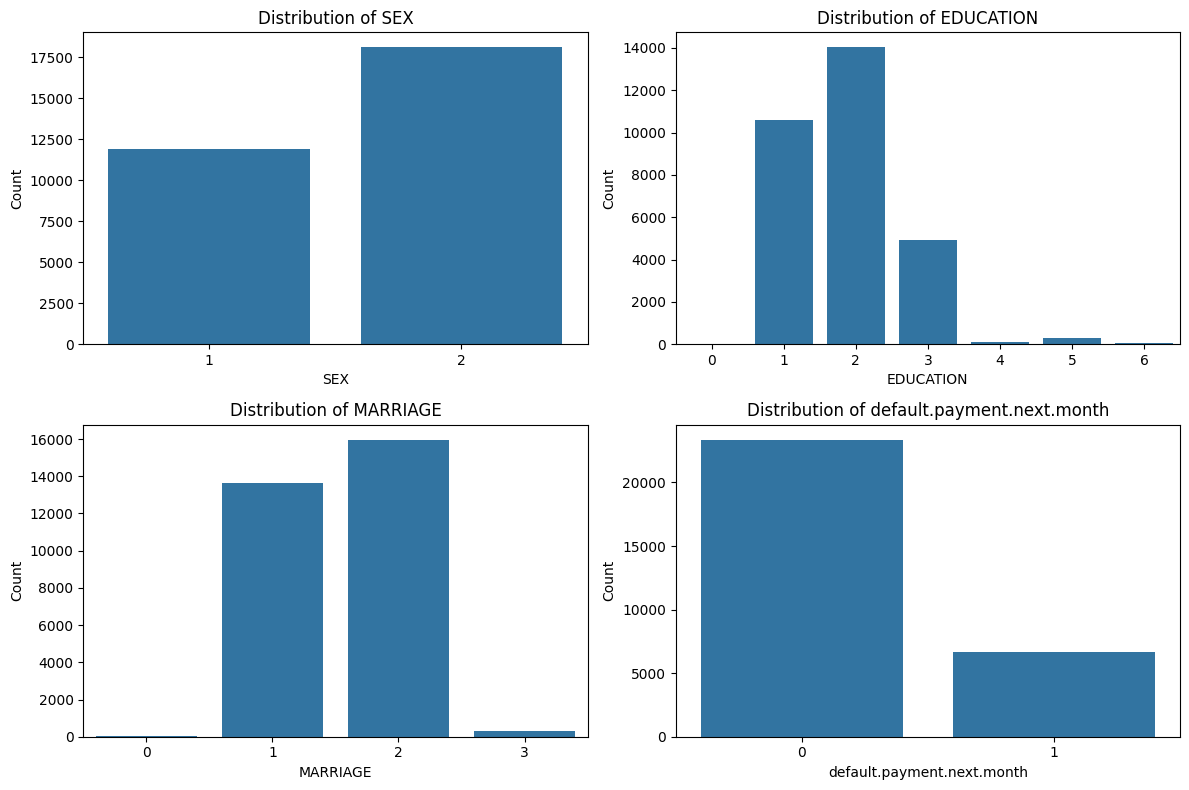

In [9]:
# Create barcharts for sex education, marriage and defaul payment next month
# Create a list of columns to plot
cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop over the columns and create a bar chart for each one
for i, col in enumerate(cols):
    # Calculate the value counts
    counts = credit_data[col].value_counts()

    # Get the row and column index for the subplot
    row = i // 2
    col_index = i % 2

    # Create the bar chart
    sns.barplot(x=counts.index, y=counts.values, ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Distribution of {col}')
    axes[row, col_index].set_xlabel(col)
    axes[row, col_index].set_ylabel('Count')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

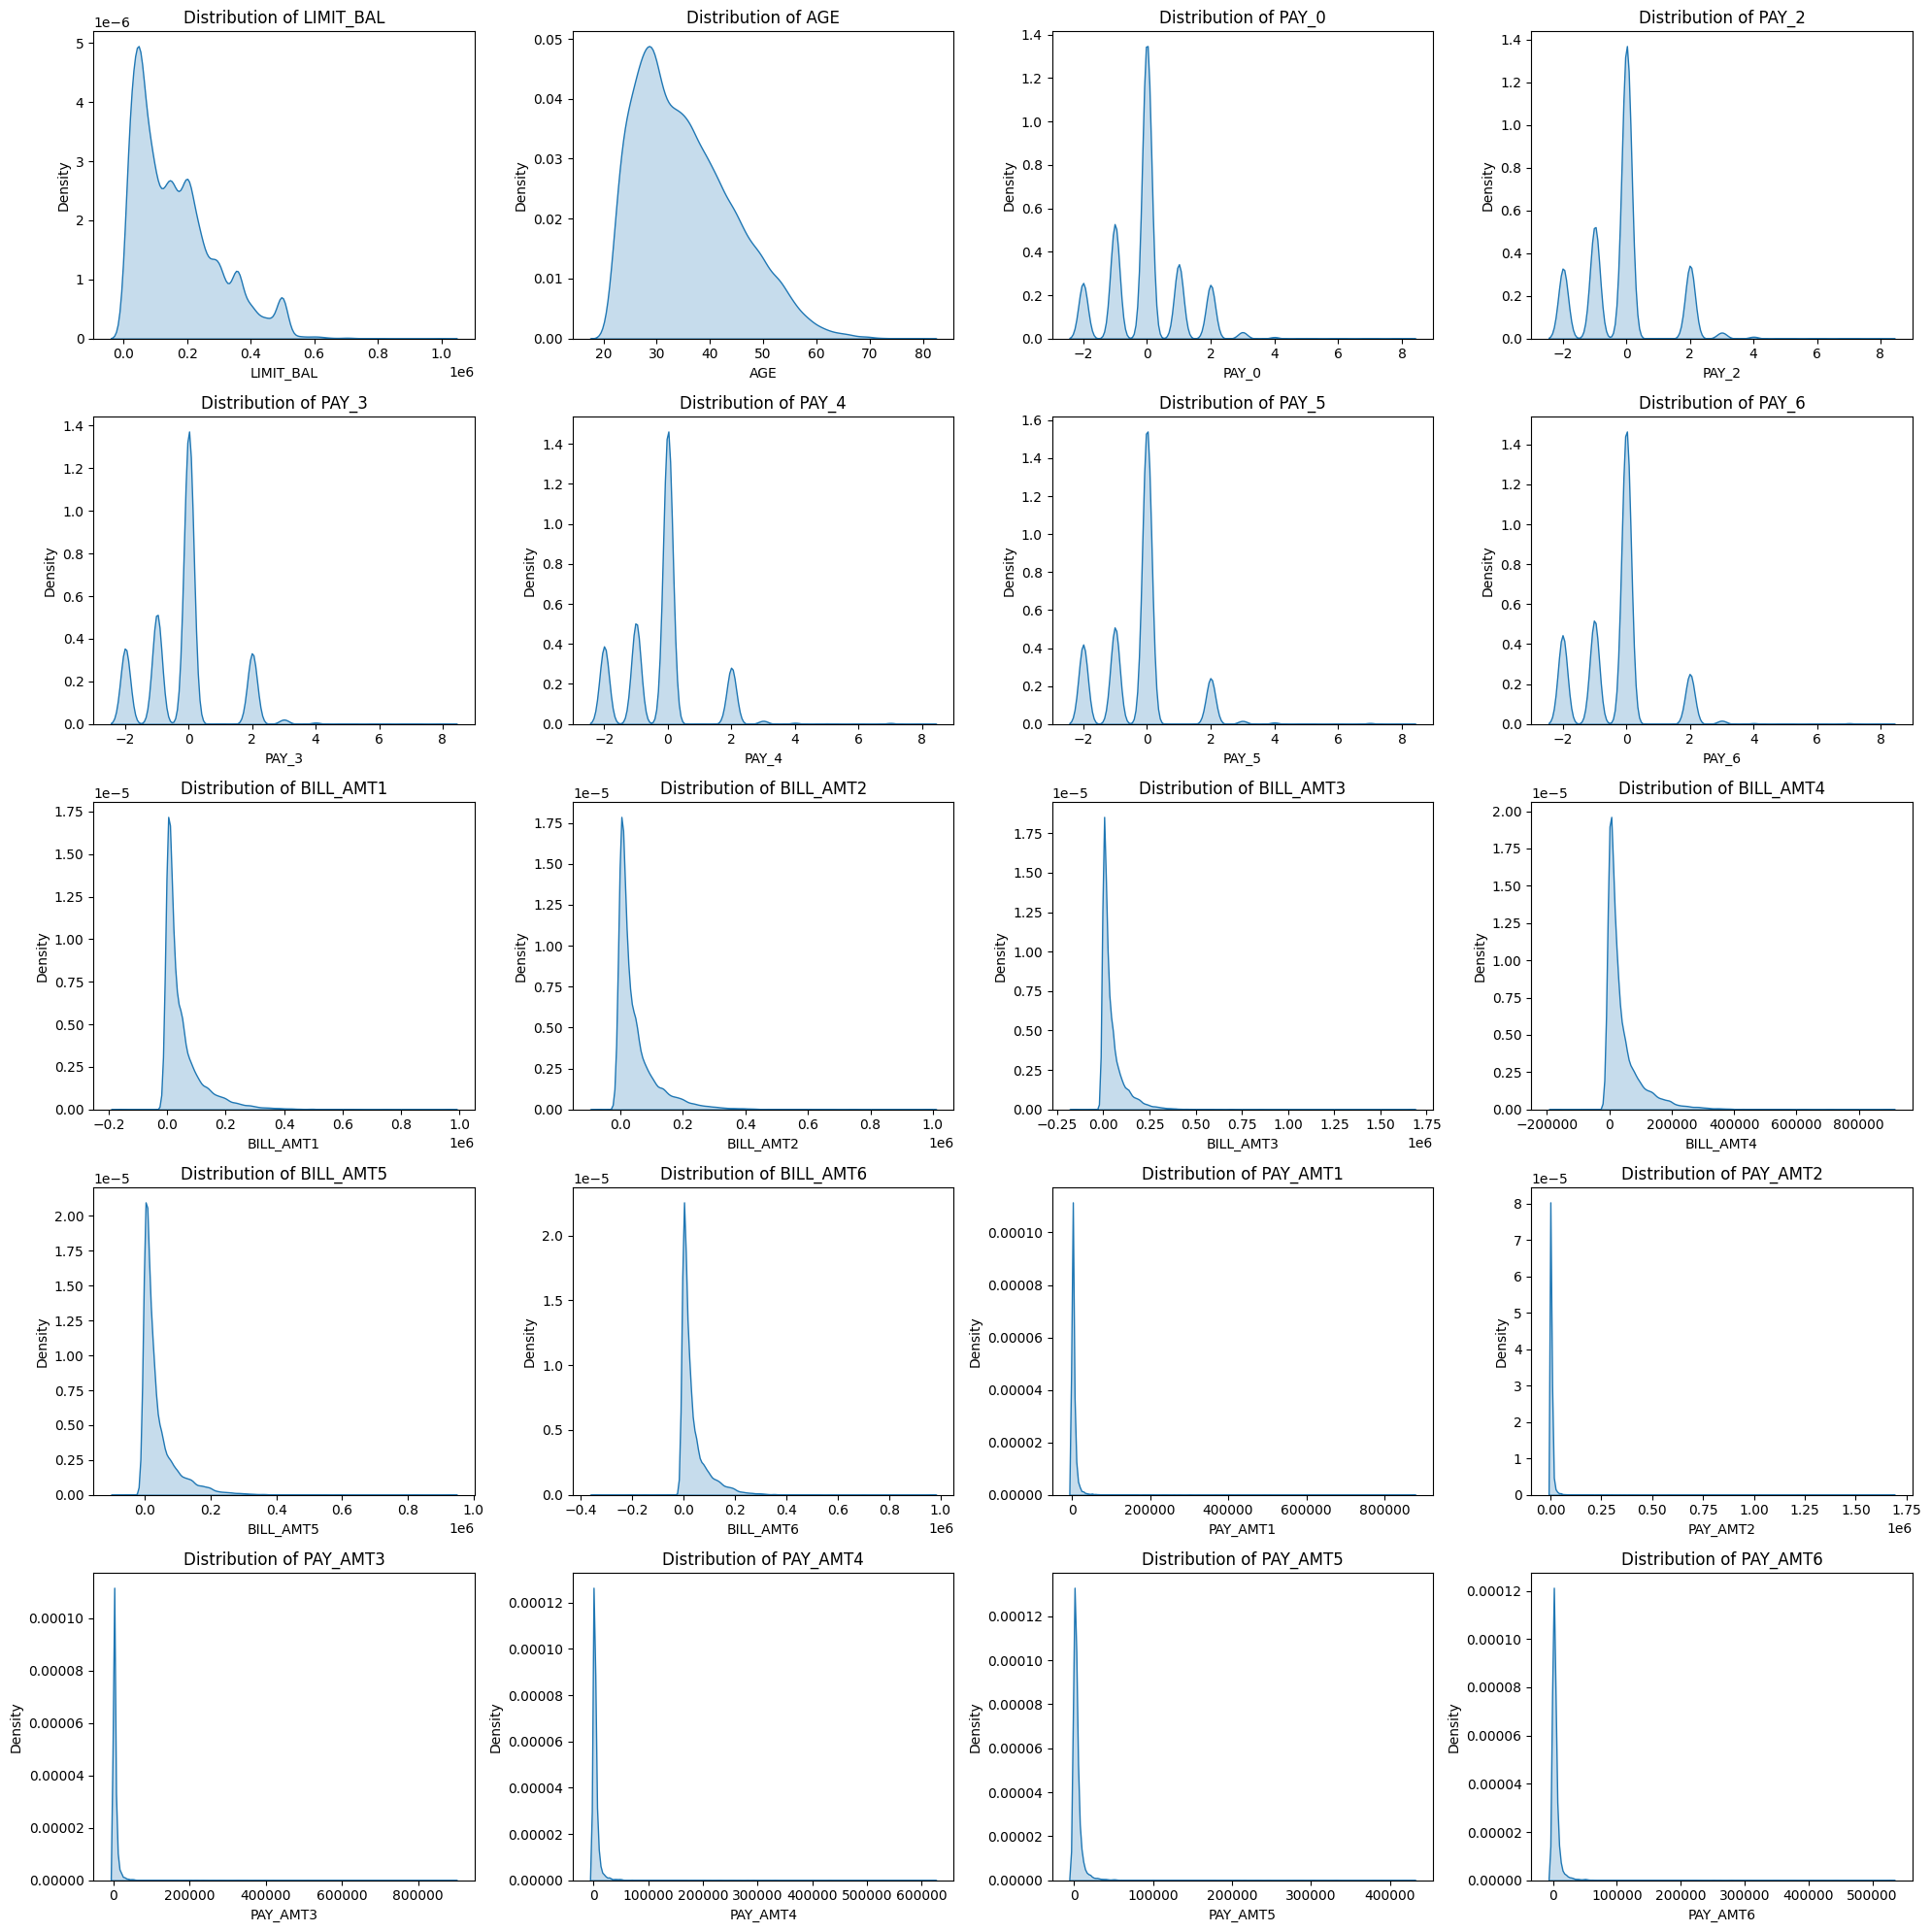

In [10]:
# Create density plots for the remaining variables
cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a figure and axes
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Loop over the columns and create a density plot for each one
for i, col in enumerate(cols):
    # Get the row and column index for the subplot
    row = i // 4
    col_index = i % 4

    # Create the density plot
    sns.kdeplot(x=credit_data[col], ax=axes[row, col_index], shade=True)
    axes[row, col_index].set_title(f'Distribution of {col}')
    axes[row, col_index].set_xlabel(col)
    axes[row, col_index].set_ylabel('Density')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

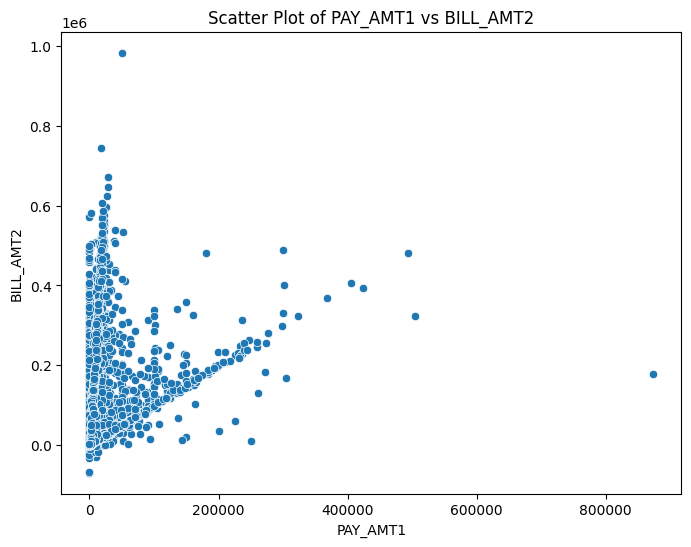

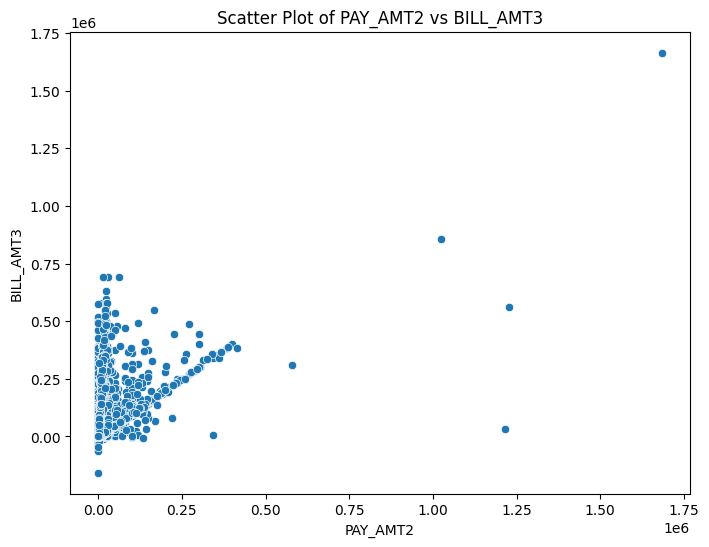

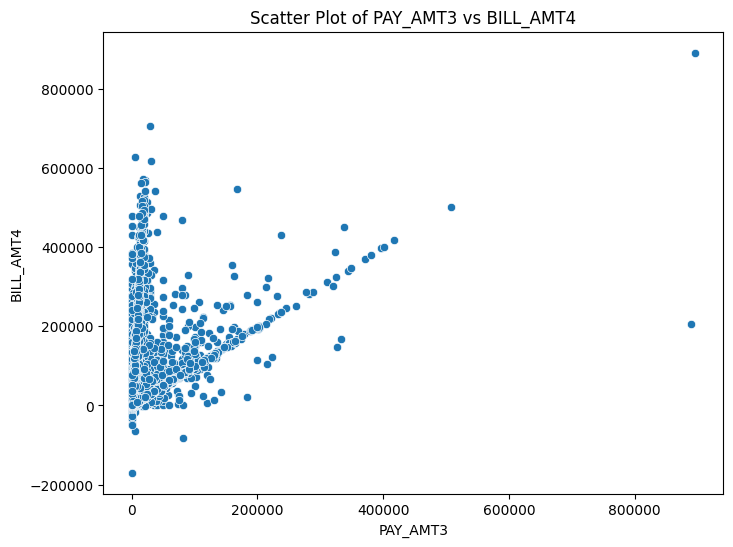

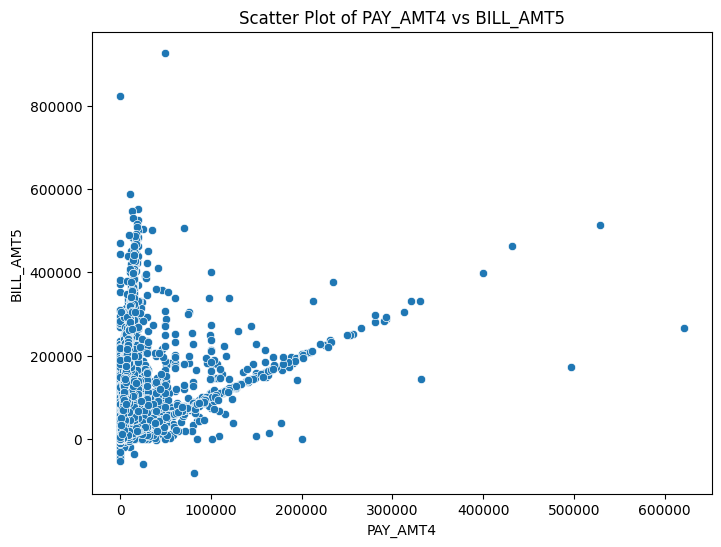

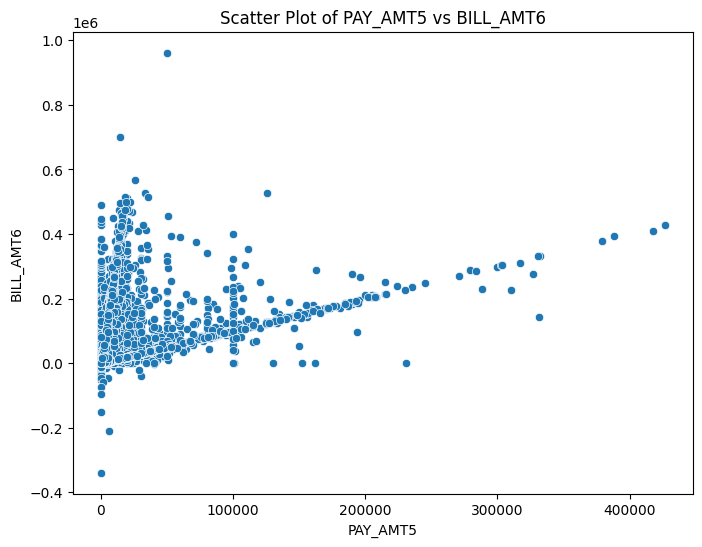

In [17]:
# Create scatter plots of the amount due at month x against the amount paid at month x+1
for i in range(1, 6):
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=f'PAY_AMT{i}', y=f'BILL_AMT{i+1}', data=credit_data)
  plt.title(f'Scatter Plot of PAY_AMT{i} vs BILL_AMT{i+1}')
  plt.xlabel(f'PAY_AMT{i}')
  plt.ylabel(f'BILL_AMT{i+1}')
  plt.show()

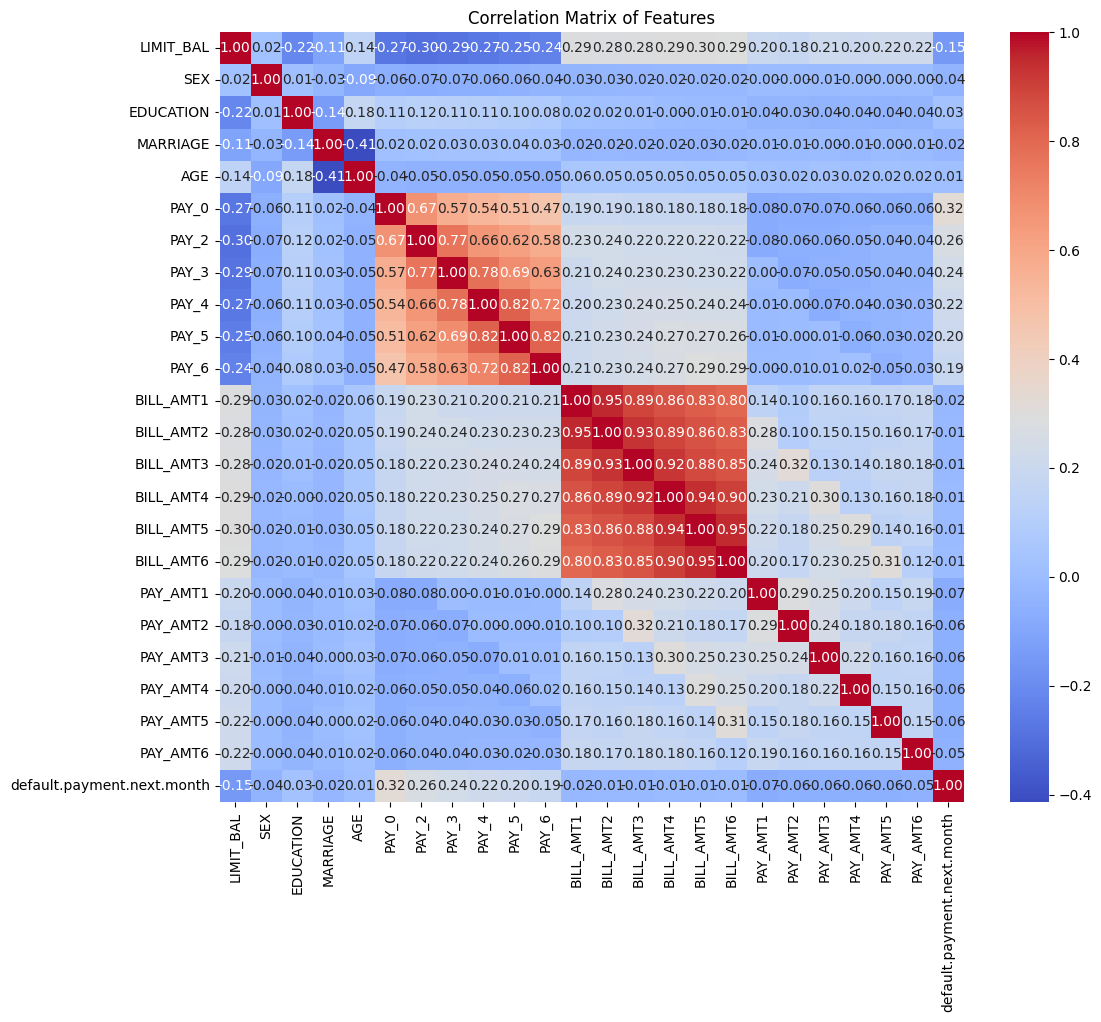

In [11]:
# Plot a correlation matrix of the features

# Calculate the correlation matrix
correlation_matrix = credit_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Modelling

In [22]:
# Define the features and targets
features  = credit_data.drop('default.payment.next.month', axis=1)
target = credit_data['default.payment.next.month']

In [24]:
# Scale the features using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [27]:
# Apply test train split to the featres and targets

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=12)


Logistic Regression

In [39]:
# Define the parameter grid for GridSearchCV
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1]}

# Create a Logistic Regression model
log_reg = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.8101666666666667
Accuracy: 0.811
[[4533  115]
 [1019  333]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4648
           1       0.74      0.25      0.37      1352

    accuracy                           0.81      6000
   macro avg       0.78      0.61      0.63      6000
weighted avg       0.80      0.81      0.77      6000



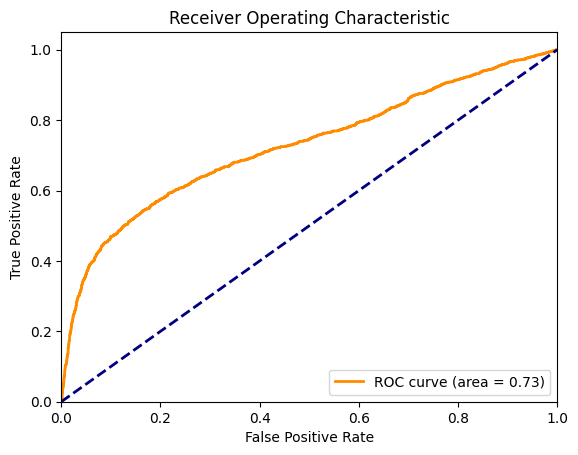

In [43]:
# Plot a ROC Curve
# Predict probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

      Feature  Importance
5       PAY_0    0.641557
11  BILL_AMT1    0.362633
18   PAY_AMT2    0.247338
17   PAY_AMT1    0.219077
13  BILL_AMT3    0.125143
6       PAY_2    0.113267
12  BILL_AMT2    0.109652
0   LIMIT_BAL    0.100016
3    MARRIAGE    0.078401
20   PAY_AMT4    0.078061
2   EDUCATION    0.076315
21   PAY_AMT5    0.069325
4         AGE    0.066074
15  BILL_AMT5    0.064441
7       PAY_3    0.064204
1         SEX    0.055488
19   PAY_AMT3    0.043010
9       PAY_5    0.036371
14  BILL_AMT4    0.035057
16  BILL_AMT6    0.027962
8       PAY_4    0.026081
22   PAY_AMT6    0.025229
10      PAY_6    0.015299


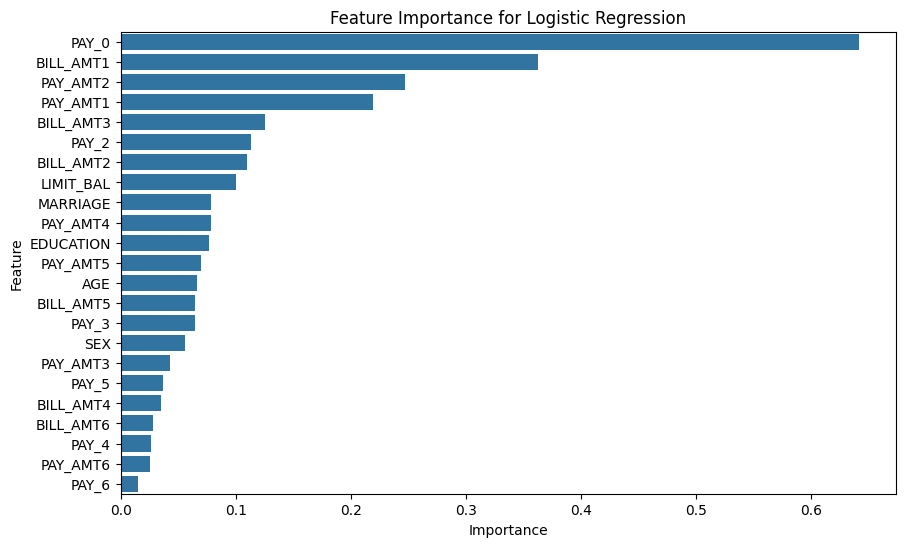

In [57]:
# Get feature importances from the trained logistic regression model
feature_importances = np.abs(best_model.coef_[0])

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Random Forest Classifier

Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - Best Score: 0.8215833333333334
Random Forest - Accuracy: 0.82
Random Forest - Confusion Matrix:
 [[4435  213]
 [ 867  485]]
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4648
           1       0.69      0.36      0.47      1352

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



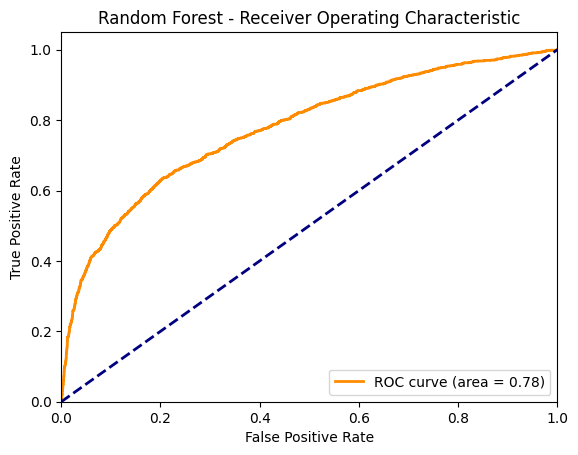

In [45]:
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=12)

# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score for Random Forest
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best Score:", grid_search_rf.best_score_)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the testing data using the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot a ROC Curve for Random Forest
# Predict probabilities for the positive class
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
# Get feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
feature_importance_df

Feature  Importance
5       PAY_0    0.241948
6       PAY_2    0.127332
7       PAY_3    0.051887
9       PAY_5    0.044777
8       PAY_4    0.042512
17   PAY_AMT1    0.041179
10      PAY_6    0.040784
0   LIMIT_BAL    0.037574
11  BILL_AMT1    0.036827
18   PAY_AMT2    0.033973
12  BILL_AMT2    0.033949
19   PAY_AMT3    0.033333
13  BILL_AMT3    0.029145
20   PAY_AMT4    0.028178
15  BILL_AMT5    0.027574
14  BILL_AMT4    0.027444
22   PAY_AMT6    0.026821
16  BILL_AMT6    0.026811
4         AGE    0.026449
21   PAY_AMT5    0.024151
2   EDUCATION    0.008140
3    MARRIAGE    0.005163
1         SEX    0.004050

XGBoost Classifier

XGBoost - Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
XGBoost - Best Score: 0.822625
XGBoost - Accuracy: 0.8223333333333334
XGBoost - Confusion Matrix:
 [[4440  208]
 [ 858  494]]
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      4648
           1       0.70      0.37      0.48      1352

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



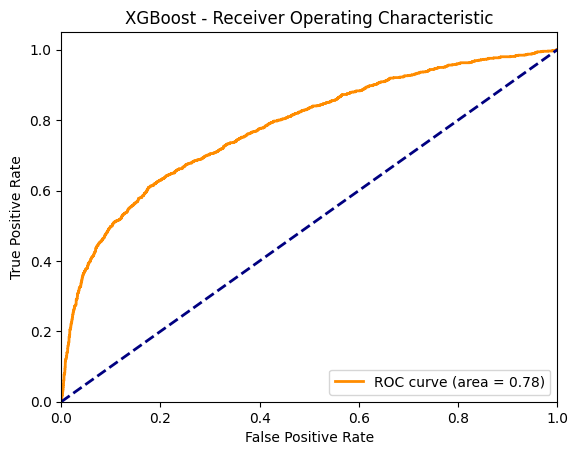

In [46]:
# Define the parameter grid for XGBoost Classifier
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an XGBoost Classifier model
xgb_classifier = XGBClassifier(random_state=12, use_label_encoder=False, eval_metric='logloss')

# Create a GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and best score for XGBoost
print("XGBoost - Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost - Best Score:", grid_search_xgb.best_score_)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the testing data using the best XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost - Accuracy:", accuracy_xgb)
print("XGBoost - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot a ROC Curve for XGBoost
# Predict probabilities for the positive class
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:
# Get feature importances from the trained XGBoost model
feature_importances_xgb = best_xgb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_xgb = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_xgb})

# Sort the DataFrame by importance in descending order
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
feature_importance_df_xgb

Feature  Importance
5       PAY_0    0.426848
6       PAY_2    0.107324
8       PAY_4    0.060662
7       PAY_3    0.043723
10      PAY_6    0.041339
9       PAY_5    0.036068
18   PAY_AMT2    0.030509
17   PAY_AMT1    0.028732
20   PAY_AMT4    0.025891
19   PAY_AMT3    0.025145
0   LIMIT_BAL    0.024494
11  BILL_AMT1    0.021344
1         SEX    0.015302
22   PAY_AMT6    0.014328
14  BILL_AMT4    0.013481
2   EDUCATION    0.013477
12  BILL_AMT2    0.013334
3    MARRIAGE    0.010735
21   PAY_AMT5    0.010670
16  BILL_AMT6    0.009946
15  BILL_AMT5    0.009637
13  BILL_AMT3    0.009201
4         AGE    0.007810

SMOTE

In [51]:
# Count frequencies of 0 and 1 in the original data
print("Original Training Data:")
print(y_train.value_counts())

Original Training Data:
default.payment.next.month
0    18716
1     5284
Name: count, dtype: int64


In [52]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=12)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Logistic Regression


Logistic Regression with SMOTE - Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Logistic Regression with SMOTE - Best Score: 0.6736752824139989
Logistic Regression with SMOTE - Accuracy: 0.6798333333333333
Logistic Regression with SMOTE - Confusion Matrix:
 [[3180 1468]
 [ 453  899]]
Logistic Regression with SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77      4648
           1       0.38      0.66      0.48      1352

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.76      0.68      0.70      6000



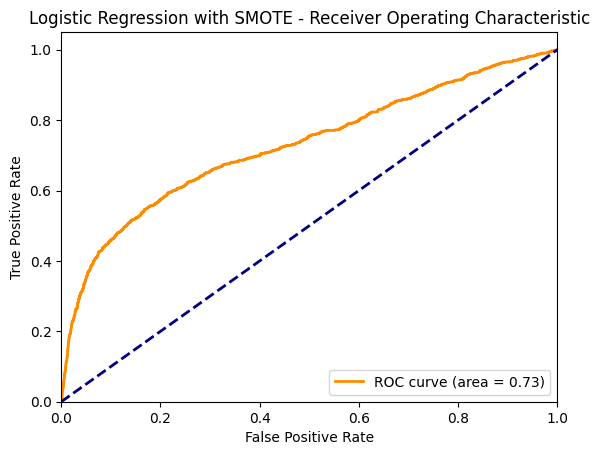

In [53]:
# Logistic Regression with SMOTE resampled data
# Define the parameter grid for GridSearchCV
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1]}

# Create a Logistic Regression model
log_reg_smote = LogisticRegression()

# Create a GridSearchCV object
grid_search_smote = GridSearchCV(log_reg_smote, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the resampled training data
grid_search_smote.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score
print("\nLogistic Regression with SMOTE - Best Parameters:", grid_search_smote.best_params_)
print("Logistic Regression with SMOTE - Best Score:", grid_search_smote.best_score_)

# Get the best model
best_model_smote = grid_search_smote.best_estimator_

# Make predictions on the testing data
y_pred_smote = best_model_smote.predict(X_test)

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Logistic Regression with SMOTE - Accuracy:", accuracy_smote)
print("Logistic Regression with SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("Logistic Regression with SMOTE - Classification Report:\n", classification_report(y_test, y_pred_smote))

# Plot a ROC Curve for Logistic Regression with SMOTE
# Predict probabilities for the positive class
y_pred_proba_smote = best_model_smote.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Plot ROC curve
plt.figure()
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression with SMOTE - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

      Feature  Importance
5       PAY_0    0.578614
11  BILL_AMT1    0.372934
18   PAY_AMT2    0.294152
17   PAY_AMT1    0.249648
13  BILL_AMT3    0.137047
6       PAY_2    0.129775
15  BILL_AMT5    0.127937
0   LIMIT_BAL    0.126774
20   PAY_AMT4    0.119702
19   PAY_AMT3    0.104625
21   PAY_AMT5    0.103574
3    MARRIAGE    0.089443
2   EDUCATION    0.079631
1         SEX    0.056406
16  BILL_AMT6    0.054059
4         AGE    0.047833
7       PAY_3    0.031420
12  BILL_AMT2    0.026676
14  BILL_AMT4    0.024030
8       PAY_4    0.014668
10      PAY_6    0.012498
9       PAY_5    0.010201
22   PAY_AMT6    0.009316


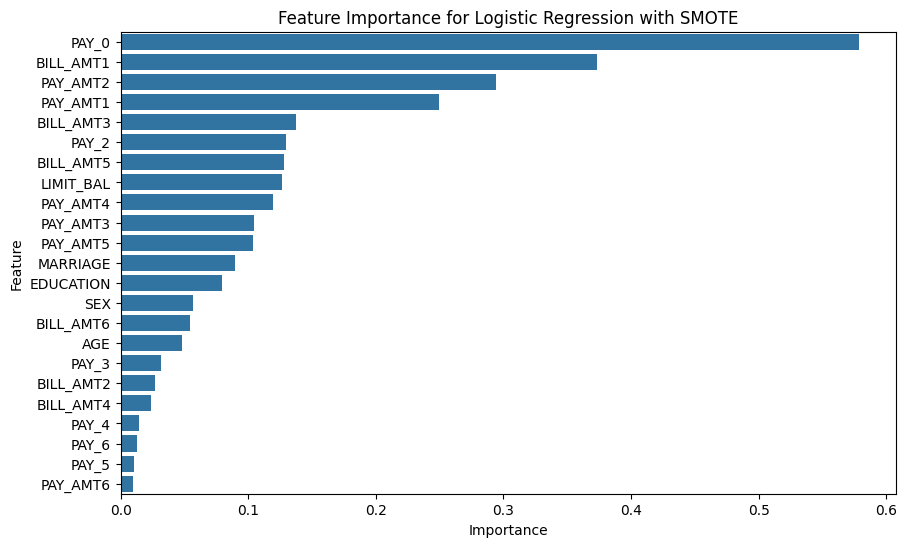

In [58]:
# Get feature importances from the trained logistic regression model with SMOTE
feature_importances_smote = np.abs(best_model_smote.coef_[0])

# Create a DataFrame to store feature names and their importances
feature_importance_df_smote = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_smote})

# Sort the DataFrame by importance in descending order
feature_importance_df_smote = feature_importance_df_smote.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df_smote)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_smote)
plt.title('Feature Importance for Logistic Regression with SMOTE')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Random Forest


Random Forest with SMOTE - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest with SMOTE - Best Score: 0.8608440256280356
Random Forest with SMOTE - Accuracy: 0.7876666666666666
Random Forest with SMOTE - Confusion Matrix:
 [[4090  558]
 [ 716  636]]
Random Forest with SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      4648
           1       0.53      0.47      0.50      1352

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.78      6000



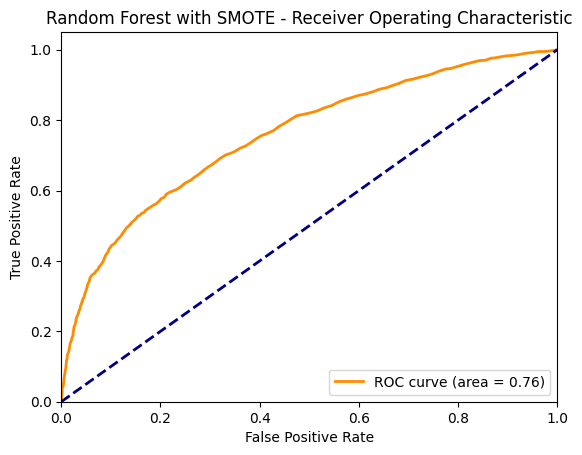

In [59]:
# Random Forest with SMOTE resampled data
# Define the parameter grid for RandomForestClassifier
param_grid_rf_smote = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier model
rf_classifier_smote = RandomForestClassifier(random_state=12)

# Create a GridSearchCV object for Random Forest with SMOTE
grid_search_rf_smote = GridSearchCV(rf_classifier_smote, param_grid_rf_smote, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the SMOTE resampled training data
grid_search_rf_smote.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score for Random Forest with SMOTE
print("\nRandom Forest with SMOTE - Best Parameters:", grid_search_rf_smote.best_params_)
print("Random Forest with SMOTE - Best Score:", grid_search_rf_smote.best_score_)

# Get the best Random Forest model with SMOTE
best_rf_model_smote = grid_search_rf_smote.best_estimator_

# Make predictions on the testing data using the best Random Forest model with SMOTE
y_pred_rf_smote = best_rf_model_smote.predict(X_test)

# Evaluate the Random Forest model with SMOTE
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
print("Random Forest with SMOTE - Accuracy:", accuracy_rf_smote)
print("Random Forest with SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))
print("Random Forest with SMOTE - Classification Report:\n", classification_report(y_test, y_pred_rf_smote))

# Plot a ROC Curve for Random Forest with SMOTE
# Predict probabilities for the positive class
y_pred_proba_rf_smote = best_rf_model_smote.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf_smote, tpr_rf_smote, thresholds_rf_smote = roc_curve(y_test, y_pred_proba_rf_smote)
roc_auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf_smote, tpr_rf_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with SMOTE - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

      Feature  Importance
5       PAY_0    0.101023
0   LIMIT_BAL    0.080921
4         AGE    0.061313
17   PAY_AMT1    0.053993
6       PAY_2    0.052901
11  BILL_AMT1    0.051388
18   PAY_AMT2    0.049186
22   PAY_AMT6    0.049082
12  BILL_AMT2    0.045728
19   PAY_AMT3    0.045662
20   PAY_AMT4    0.043868
13  BILL_AMT3    0.043047
21   PAY_AMT5    0.042550
16  BILL_AMT6    0.042197
15  BILL_AMT5    0.041655
14  BILL_AMT4    0.041598
7       PAY_3    0.031719
2   EDUCATION    0.026723
8       PAY_4    0.025287
10      PAY_6    0.024531
9       PAY_5    0.021797
3    MARRIAGE    0.012671
1         SEX    0.011160


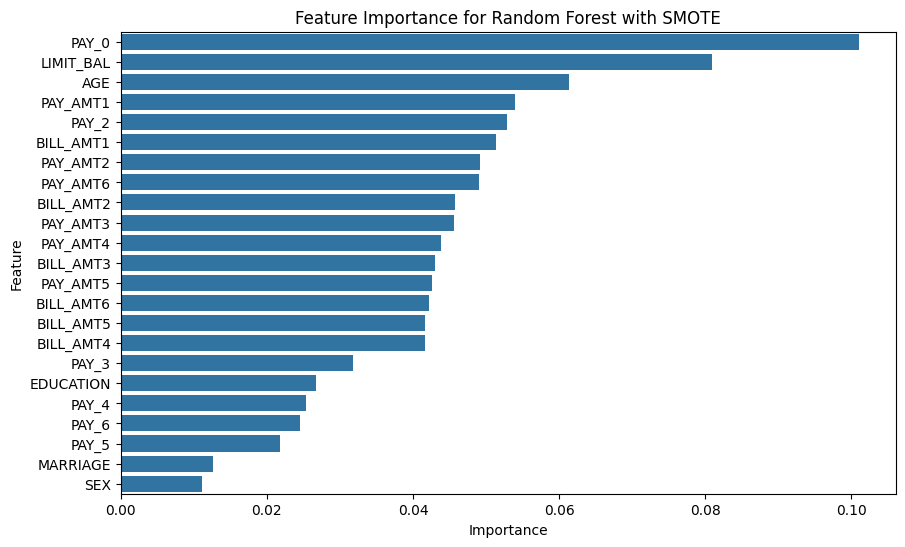

In [60]:
# Get feature importances from the trained Random Forest model with SMOTE
feature_importances_rf_smote = best_rf_model_smote.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_rf_smote = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_rf_smote})

# Sort the DataFrame by importance in descending order
feature_importance_df_rf_smote = feature_importance_df_rf_smote.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df_rf_smote)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf_smote)
plt.title('Feature Importance for Random Forest with SMOTE')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

XGBoost Classifier


XGBoost with SMOTE - Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
XGBoost with SMOTE - Best Score: 0.8532868495792565
XGBoost with SMOTE - Accuracy: 0.8008333333333333
XGBoost with SMOTE - Confusion Matrix:
 [[4246  402]
 [ 793  559]]
XGBoost with SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      4648
           1       0.58      0.41      0.48      1352

    accuracy                           0.80      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.78      0.80      0.79      6000



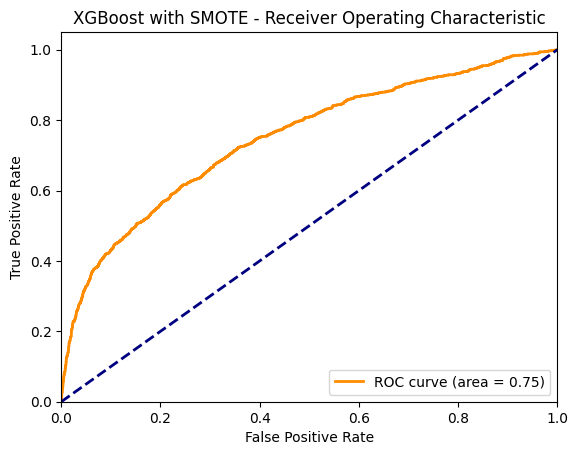

      Feature  Importance
5       PAY_0    0.280455
10      PAY_6    0.066313
2   EDUCATION    0.064893
0   LIMIT_BAL    0.062324
8       PAY_4    0.054522
7       PAY_3    0.051270
4         AGE    0.045033
9       PAY_5    0.040426
6       PAY_2    0.039822
18   PAY_AMT2    0.027278
22   PAY_AMT6    0.026431
20   PAY_AMT4    0.023236
17   PAY_AMT1    0.023100
3    MARRIAGE    0.022400
11  BILL_AMT1    0.021585
1         SEX    0.020863
15  BILL_AMT5    0.020125
19   PAY_AMT3    0.020086
21   PAY_AMT5    0.020072
13  BILL_AMT3    0.018140
12  BILL_AMT2    0.017585
16  BILL_AMT6    0.017235
14  BILL_AMT4    0.016806


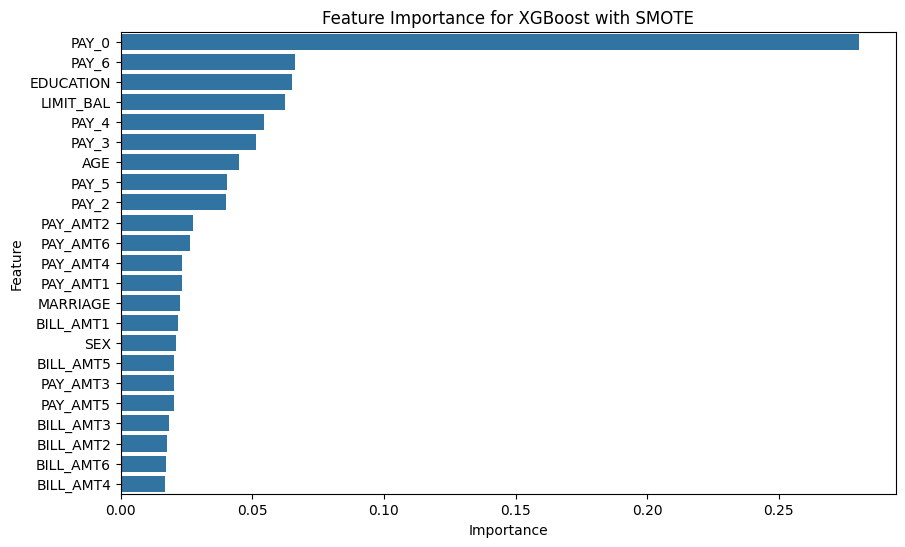

In [61]:
# XGBoost with SMOTE resampled data
# Define the parameter grid for XGBoost Classifier
param_grid_xgb_smote = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an XGBoost Classifier model
xgb_classifier_smote = XGBClassifier(random_state=12, use_label_encoder=False, eval_metric='logloss')

# Create a GridSearchCV object for XGBoost with SMOTE
grid_search_xgb_smote = GridSearchCV(xgb_classifier_smote, param_grid_xgb_smote, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the SMOTE resampled training data
grid_search_xgb_smote.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score for XGBoost with SMOTE
print("\nXGBoost with SMOTE - Best Parameters:", grid_search_xgb_smote.best_params_)
print("XGBoost with SMOTE - Best Score:", grid_search_xgb_smote.best_score_)

# Get the best XGBoost model with SMOTE
best_xgb_model_smote = grid_search_xgb_smote.best_estimator_

# Make predictions on the testing data using the best XGBoost model with SMOTE
y_pred_xgb_smote = best_xgb_model_smote.predict(X_test)

# Evaluate the XGBoost model with SMOTE
accuracy_xgb_smote = accuracy_score(y_test, y_pred_xgb_smote)
print("XGBoost with SMOTE - Accuracy:", accuracy_xgb_smote)
print("XGBoost with SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smote))
print("XGBoost with SMOTE - Classification Report:\n", classification_report(y_test, y_pred_xgb_smote))

# Plot a ROC Curve for XGBoost with SMOTE
# Predict probabilities for the positive class
y_pred_proba_xgb_smote = best_xgb_model_smote.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb_smote, tpr_xgb_smote, thresholds_xgb_smote = roc_curve(y_test, y_pred_proba_xgb_smote)
roc_auc_xgb_smote = auc(fpr_xgb_smote, tpr_xgb_smote)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb_smote, tpr_xgb_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost with SMOTE - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Get feature importances from the trained XGBoost model with SMOTE
feature_importances_xgb_smote = best_xgb_model_smote.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_xgb_smote = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_xgb_smote})

# Sort the DataFrame by importance in descending order
feature_importance_df_xgb_smote = feature_importance_df_xgb_smote.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df_xgb_smote)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb_smote)
plt.title('Feature Importance for XGBoost with SMOTE')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()